# Pandas

Pandas es una biblioteca de código abierto con licencia BSD que proporciona estructuras de datos y herramientas de análisis de datos de alto rendimiento y fáciles de usar para el lenguaje de programación Python.


## Data Frame 
El principal objeto en Pandas es el dataframe, el cual es muy similar a una planilla o tabla de Excel. Podemos crear dataframes de varias maneras:

* Diccionario {Nombre columna: Valores}

In [3]:
import pandas as pd
import numpy as np
 
name_age = {'Name' : ['Ali', 'Bill', 'David', 'Hany', 'Ibtisam'], 'Age' : [32, 55, 20, 43, 30]}
print(type(name_age))
data_frame = pd.DataFrame(name_age)
print(name_age)
data_frame.head()

<class 'dict'>
{'Name': ['Ali', 'Bill', 'David', 'Hany', 'Ibtisam'], 'Age': [32, 55, 20, 43, 30]}


,Name,Age
0,Ali,32
1,Bill,55
2,David,20
3,Hany,43
4,Ibtisam,30


* Lista de Diccionarios: [{Columna1: valor, Columna2: valor},{Columna1: valor, Columna2: valor}]

  Cada elemento de la lista corresponde a una fila

In [0]:
name_age = [{'Name': 'Ali','Age':32},{'Name': 'Bill','Age':55},{'Name': 'David','Age':20},{'Name': 'Hany','Age':43},{'Name': 'Ibtisam','Age':30}]
print(type(name_age))
data_frame = pd.DataFrame(name_age)
data_frame

<class 'list'>


,Name,Age
0,Ali,32
1,Bill,55
2,David,20
3,Hany,43
4,Ibtisam,30


## Leer un archivo CSV

Otra manera de crear dataframes, es leyendo archivos con datos, en lugar de armarlos nosotros a mano. La librería pandas permite abrir y guardar los dataframes en muchos formatos distintos https://pandas.pydata.org/pandas-docs/stable/reference/io.html

### Carga de Archivos

Lo primero que debemos resolver es cómo subir archivos a Google Colab. Existen múltiples maneras:

* Si tenemos una url, podemos descargarla directamente a Colab de la siguiente manera:

In [0]:
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

--2020-04-21 00:16:52--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv.1’

titanic.csv.1       100%[===================>]  43.19K  --.-KB/s    in 0.04s   

2020-04-21 00:16:52 (1.09 MB/s) - ‘titanic.csv.1’ saved [44225/44225]



* Otra opción es subir el archivo manualmente:

In [0]:
from google.colab import files

uploaded=files.upload()

KeyboardInterrupt: ignored

In [0]:
import io
import pandas as pd

df2 = pd.read_csv('titanic.csv')
df2.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


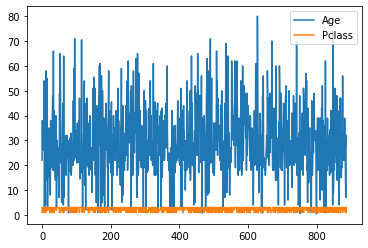

In [0]:
df2.head()
df3=df2[['Age', 'Pclass']]
df3.plot()

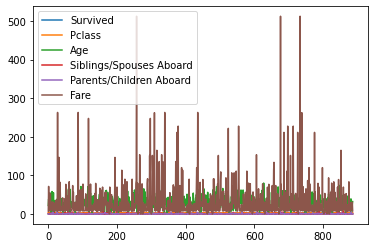

In [0]:
df2.plot()

* Por último, es posible acceder a Google Drive en colab:

In [5]:
from google.colab import drive

drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google'

Una vez que tenemos el archivo que queremos en colab, podemos abrirlo con la función **read_csv**

In [0]:
df_alturas = pd.read_csv('/content/alturas-pesos-mils-train-checkpoint.csv')

##Visualización y manipulación de Data Frames

El dataframe podría contener miles de filas. Si queremos mostrar sólo las N primeras, podemos usar el método **head(N)**

In [0]:

df_alturas.head(3)

,Unnamed: 0,Genero,Peso,Altura
0,7620,Mujer,61.235,162.402
1,1837,Hombre,97.432,181.908
2,3311,Hombre,73.324,172.459


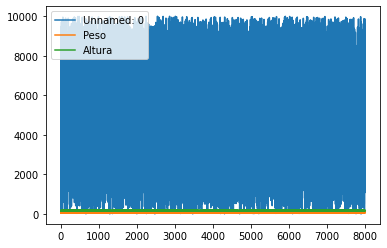

In [0]:
df_alturas.plot()

También podemos ver las N últimas con **tail(N)**:

In [0]:
df_alturas.tail(3)

,Unnamed: 0,Genero,Peso,Altura
7997,3476,Hombre,75.461,170.910
7998,7084,Mujer,65.461,166.137
7999,3346,Hombre,80.323,171.575


Si queremos filtrar dataframes, es posible de la siguiente manera.

In [0]:
df_alturas[df_alturas['Genero'] == 'Mujer'].head(5)

,Unnamed: 0,Genero,Peso,Altura
0,7620,Mujer,61.235,162.402
3,9478,Mujer,55.193,157.748
4,7805,Mujer,56.886,151.798
5,6737,Mujer,59.834,158.623
7,6018,Mujer,68.889,169.225


En este caso,
```
df['Genero'] == 'Mujer'
```
genera un objeto Series con True en donde se cumple la condición y False donde no. Luego podemos quedarnos con solo las filas que cumplen la condición indexando el dataframe con este Series resultante.

Podemos combinar múltiples condiciones usando operadores lógicos:

In [0]:
df_alturas[(df_alturas['Genero'] == 'Mujer') & (df_alturas['Altura'] > 170)].head(5)

,Unnamed: 0,Genero,Peso,Altura
36,8629,Mujer,78.480,174.042
51,6930,Mujer,80.265,176.153
75,9633,Mujer,91.056,177.523
76,8934,Mujer,69.333,172.203
84,5810,Mujer,78.815,173.070


Otra cosa que podemos hacer es deshacernos de una columna que no nos sirva.

In [0]:
df_alturas = df_alturas.drop('Unnamed: 0', axis=1)
df_alturas

,Genero,Peso,Altura
0,Mujer,61.235,162.402
1,Hombre,97.432,181.908
2,Hombre,73.324,172.459
3,Mujer,55.193,157.748
4,Mujer,56.886,151.798
...,...,...,...
7995,Mujer,62.215,160.083
7996,Hombre,83.840,177.866
7997,Hombre,75.461,170.910
7998,Mujer,65.461,166.137


O de una fila:

In [0]:
df_alturas.drop(2)

,Genero,Peso,Altura
0,Mujer,61.235,162.402
1,Hombre,97.432,181.908
3,Mujer,55.193,157.748
4,Mujer,56.886,151.798
5,Mujer,59.834,158.623
...,...,...,...
7995,Mujer,62.215,160.083
7996,Hombre,83.840,177.866
7997,Hombre,75.461,170.910
7998,Mujer,65.461,166.137


Y ordenar de otra manera las columnas que tenemos

In [0]:
df_alturas[['Peso','Altura','Genero']].head(5)

,Peso,Altura,Genero
0,61.235,162.402,Mujer
1,97.432,181.908,Hombre
2,73.324,172.459,Hombre
3,55.193,157.748,Mujer
4,56.886,151.798,Mujer


Puede que nuestros datos tengan entradas duplicadas. Es fácil detectarlas usando el método **duplicated()** y borrarlas usando **drop_duplicates()**

In [4]:
frame_data = {'name': ['James', 'Jason', 'Rogers', 'Jason'], 'age': [18, 20, 22, 20], 'job': ['Assistant', 'Manager', 'Clerk', 'Manager']}
df = pd.DataFrame(frame_data)
print('Dataframe original\n')
print(df)
print('\n¿Está duplicado?\n')
print(df.duplicated())
print('\nEntradas duplicadas\n')
print(df[df.duplicated()])
print('\nDataframe sin entradas duplicadas\n')
print(df.drop_duplicates())

Dataframe original

     name  age        job
0   James   18  Assistant
1   Jason   20    Manager
2  Rogers   22      Clerk
3   Jason   20    Manager

¿Está duplicado?

0    False
1    False
2    False
3     True
dtype: bool

Entradas duplicadas

    name  age      job
3  Jason   20  Manager

Dataframe sin entradas duplicadas

     name  age        job
0   James   18  Assistant
1   Jason   20    Manager
2  Rogers   22      Clerk


Un método útil es describe(), el cual hace un resumen estadístico de los datos

In [0]:
df_alturas.describe()

,Peso,Altura
count,8000.000000,8000.000000
mean,72.802476,168.113424
std,14.624699,9.829018
min,31.207000,138.866000
25%,61.071750,160.765750
50%,72.748500,167.976500
75%,84.523250,175.320000
max,121.687000,199.824000


Los índices no necesariamente tienen que ser números:

In [0]:
df.index = ['A','B','C','D']
df

,name,age,job
A,James,18,Assistant
B,Jason,20,Manager
C,Rogers,22,Clerk
D,Jason,20,Manager


Luego, podemos acceder a filas mediante el índice usando **.loc[]** o mediante **.iloc[]** utilizando el número de índice.

In [0]:
print(df.loc['B'])
print('\n')
print(df.iloc[1])

name      Jason
age          20
job     Manager
Name: B, dtype: object


name      Jason
age          20
job     Manager
Name: B, dtype: object


## Operaciones con columnas

Podemos seleccionar columnas de las siguientes formas:

In [0]:
print(df_alturas['Altura'])
print('\n')
print(df_alturas.Altura)

0       162.402
1       181.908
2       172.459
3       157.748
4       151.798
         ...   
7995    160.083
7996    177.866
7997    170.910
7998    166.137
7999    171.575
Name: Altura, Length: 8000, dtype: float64


0       162.402
1       181.908
2       172.459
3       157.748
4       151.798
         ...   
7995    160.083
7996    177.866
7997    170.910
7998    166.137
7999    171.575
Name: Altura, Length: 8000, dtype: float64


Si utilizamos la función de Python **type()** podemos ver que el objeto resultante es un Series:

In [0]:
type(df_alturas['Altura'])

pandas.core.series.Series

Algunas de las cosas que se pueden hacer con Series son:
* Operaciones como calcular promedio, desviación estándar, suma, etc...

In [0]:
promedio = df_alturas['Altura'].mean()
promedio
sumatoria = df_alturas['Altura'].sum()
sumatoria

1344907.393

In [0]:
promedio = df_alturas['Altura'].mean()
print('Promedio de altura: {}'.format(promedio))
desviacion = df_alturas['Altura'].std()
print('Desviación estándar de altura: {:.3f}'.format(desviacion))
sumatoria = df_alturas['Altura'].sum()
print('Suma de las alturas: {}'.format(sumatoria))

Promedio de altura: 168.11342412500022
Desviación estándar de altura: 9.829
Suma de las alturas: 1344907.393


* Podemos obtener los valores únicos:

In [0]:
df_alturas['Genero'].unique()

array(['Mujer', 'Hombre'], dtype=object)

* Podemos contar cuántas veces ocurre cada valor:

In [0]:
df_alturas['Genero'].value_counts()

Hombre    4002
Mujer     3998
Name: Genero, dtype: int64

* Podemos ordenar los valores:

In [0]:
df_alturas['Peso'].sort_values()

948      31.207
32       31.783
7727     34.876
6528     34.971
129      35.144
         ...   
5743    114.927
2846    115.018
622     115.459
1083    116.483
4744    121.687
Name: Peso, Length: 8000, dtype: float64

* Podemos aplicar una misma función a cada elemento del Series usando **apply**. Por default, aplica la función a cada fila.

In [0]:
df_alturas['Peso'].apply(np.sqrt)

0       7.825280
1       9.870765
2       8.562943
3       7.429199
4       7.542281
          ...   
7995    7.887649
7996    9.156419
7997    8.686829
7998    8.090797
7999    8.962310
Name: Peso, Length: 8000, dtype: float64

Si cambiamos el argumento axis a 1, entonces aplicará la función a cada fila, y podremos realizar operaciones relacionando datos de columnas. En este caso, podemos calcular el índice de masa corporal:

In [0]:
imc = df_alturas.apply(lambda x: x['Peso']/x['Altura'],axis=1)
imc

0       0.377058
1       0.535611
2       0.425168
3       0.349881
4       0.374748
          ...   
7995    0.388642
7996    0.471366
7997    0.441525
7998    0.394018
7999    0.468151
Length: 8000, dtype: float64

Algo que nos puede interesar hacer con este dataframe es calcular el promedio de alturas, pero en vez de todo junto, agrupado por género. Pandas tiene una función llamada **groupby**, la cual es muy útil para eso:

In [0]:
df_alturas.groupby('Genero').mean()

,Peso,Altura
Genero,,
Hombre,84.455398,174.915330
Mujer,61.137895,161.304713


## Operaciones entre dataframes

A modo de ejemplo, vamos a transformar el data frame en 2 separados, uno de hombres y otro de mujeres.

In [0]:
df_mujeres = df_alturas[(df_alturas['Genero'] == 'Mujer')]
df_hombres = df_alturas[(df_alturas['Genero'] == 'Hombre')]

print('Dataframe de mujeres: \n')
print(df_mujeres.head(5))
print('\nDataframe de hombres: \n')
print(df_hombres.head(5))

Dataframe de mujeres: 

  Genero    Peso   Altura
0  Mujer  61.235  162.402
3  Mujer  55.193  157.748
4  Mujer  56.886  151.798
5  Mujer  59.834  158.623
7  Mujer  68.889  169.225

Dataframe de hombres: 

    Genero    Peso   Altura
1   Hombre  97.432  181.908
2   Hombre  73.324  172.459
6   Hombre  77.618  172.705
9   Hombre  83.248  177.908
11  Hombre  81.272  166.769


Ahora vamos a usar la función **concat()** nos permite unir varios dataframes:

In [0]:
df_todos = pd.concat([df_mujeres,df_hombres])
df_todos

,Genero,Peso,Altura
0,Mujer,61.235,162.402
3,Mujer,55.193,157.748
4,Mujer,56.886,151.798
5,Mujer,59.834,158.623
7,Mujer,68.889,169.225
...,...,...,...
7993,Hombre,100.442,185.027
7994,Hombre,92.479,176.934
7996,Hombre,83.840,177.866
7997,Hombre,75.461,170.910


También, si dos dataframes tienen la misma estructura, es posible hacer operaciones entre ellos:

In [0]:
dictionary_1 = {'A' : [5, 8, 10, 3, 9], 'B' : [6, 1, 4, 8, 7]}
dictionary_2 = {'A' : [4, 3, 7, 6, 1], 'B' : [9, 10, 10, 1, 2]}
data_frame_1 = pd.DataFrame(dictionary_1)
data_frame_2 = pd.DataFrame(dictionary_2)
data_frame_suma = data_frame_1 + data_frame_2
data_frame_resta = data_frame_1 - data_frame_2

print('A\n')
print(data_frame_1)
print('\nB\n')
print(data_frame_2)
print('\nA+B\n')
print(data_frame_suma)
print('\nA-B\n')
print(data_frame_resta)

A

    A  B
0   5  6
1   8  1
2  10  4
3   3  8
4   9  7

B

   A   B
0  4   9
1  3  10
2  7  10
3  6   1
4  1   2

A+B

    A   B
0   9  15
1  11  11
2  17  14
3   9   9
4  10   9

A-B

   A  B
0  1 -3
1  5 -9
2  3 -6
3 -3  7
4  8  5


# Gráficos

Vamos a utilizar matplotlib y seaborn, las cuales son librería para realizar gráficos, y visualizar datos sobre los pasajeros del Titanic:

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df_titanic = pd.read_csv('titanic.csv')
print(type(df_titanic))

df_titanic.head()
df_titanic.plot()

<class 'pandas.core.frame.DataFrame'>


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Text(0.5, 1.0, 'Sobrevivieron - porcentaje total')

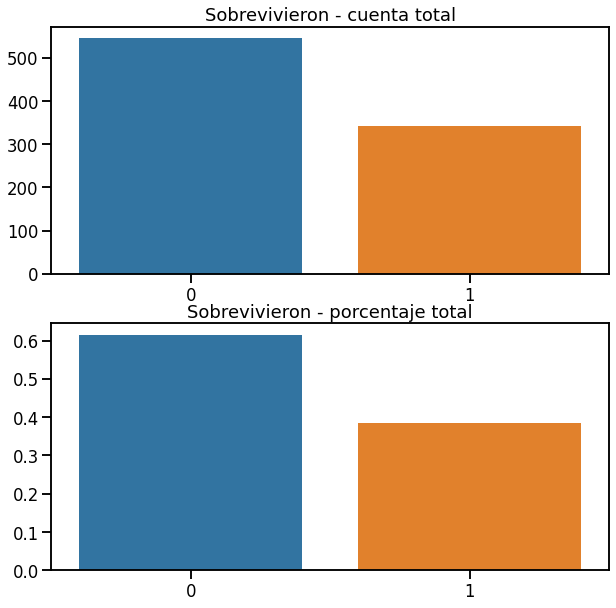

In [0]:
# Seaborn nos permite dar formatos distintos a nuestros gráficos, según si irán en un paper, charla o poster:
sns.set_context('talk')

#Creamos una grilla de 2 filas por 1 columna, con tamaño (10,10)
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
n_survivors = df_titanic['Survived'].value_counts()
sns.barplot(n_survivors.index,n_survivors.values,ax=ax[0])
ax[0].set_title('Sobrevivieron - cuenta total')

# Hay manera un poco mas amigable de interpretar datos....con porcentajes!
perc_survivors = df_titanic['Survived'].value_counts(normalize=True)
sns.barplot(perc_survivors.index,perc_survivors.values,ax=ax[1])
ax[1].set_title('Sobrevivieron - porcentaje total')

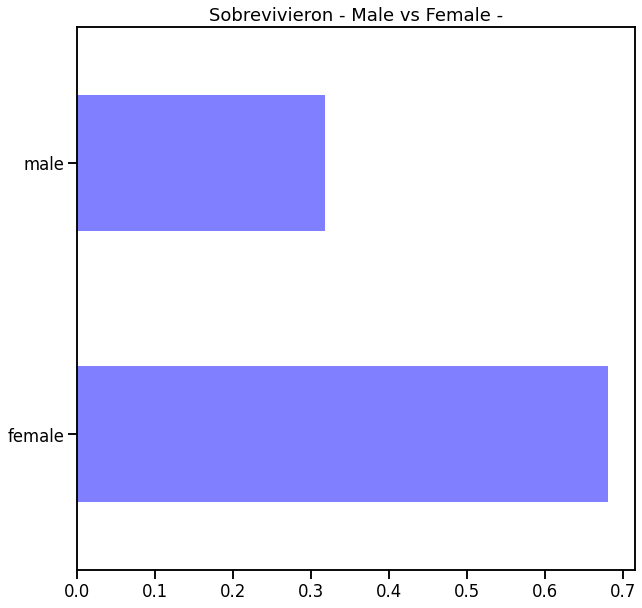

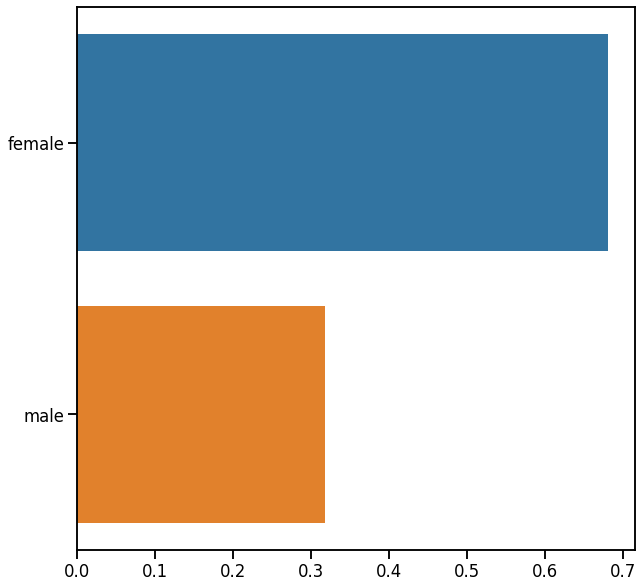

In [0]:
#Sobrevivieron mas hombres o mas mujeres?
plt.figure(figsize=(10,10))

#Podemos hacer el gráfico directamente con pandas:
df_titanic.Sex[df_titanic.Survived == 1].value_counts(normalize = True).plot(kind='barh', alpha=0.5, color='blue')
plt.title('Sobrevivieron - Male vs Female -')
plt.show()

#Usar seaborn:
plt.figure(figsize=(10,10))
survivors_genre = df_titanic['Sex'][df_titanic['Survived']==1].value_counts(normalize=True)
sns.barplot(survivors_genre.values,survivors_genre.index,orient='h')

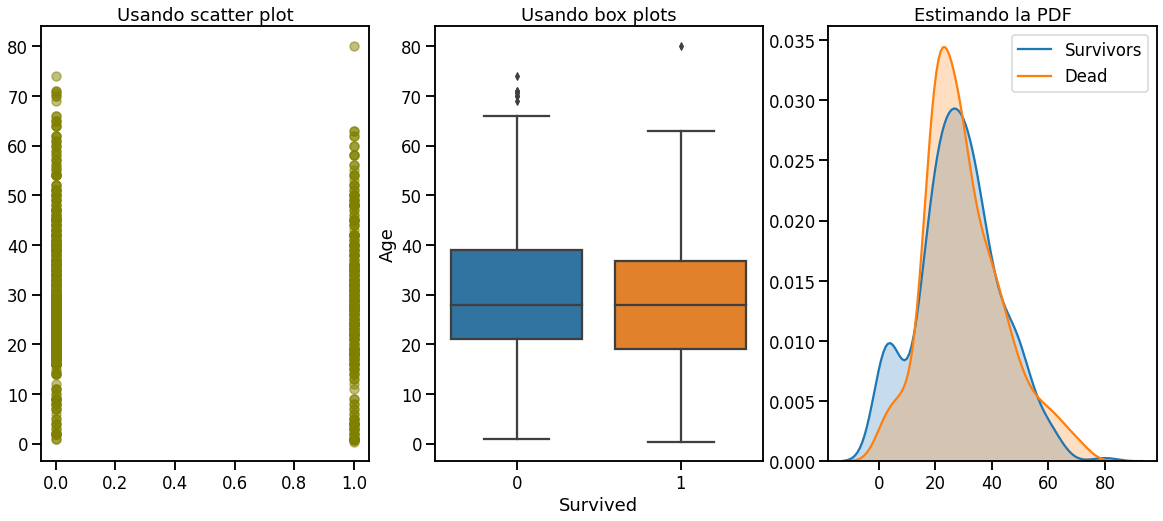

In [0]:
# Que relacion hay entre sobrevivencia y edad de los sobrevivientes


fig,ax = plt.subplots(ncols=3,nrows=1,figsize=(20,8))
ax[0].set_title('Usando scatter plot')
ax[0].scatter(df_titanic.Survived, df_titanic.Age, alpha=0.5, color='#808000')

ax[1].set_title('Usando box plots')
sns.boxplot(x=df_titanic.Survived,y=df_titanic.Age,ax=ax[1])

ax[2].set_title('Estimando la PDF')
survivors_ages = df_titanic[df_titanic.Survived == 1].Age
not_survivors_ages = df_titanic[df_titanic.Survived == 0].Age
sns.kdeplot(survivors_ages,shade=True,ax=ax[2],label='Survivors')
sns.kdeplot(not_survivors_ages,shade=True,ax=ax[2],label='Dead')

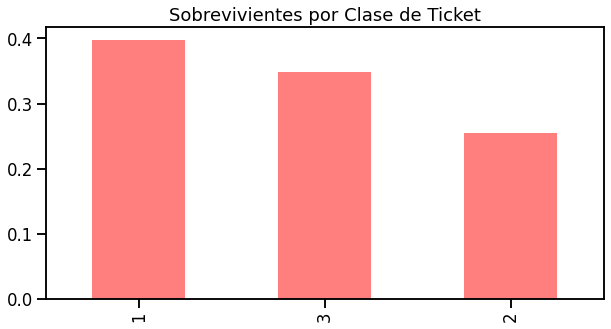

In [0]:
# La clase del ticket fue un factor de sobrevivencia (si viste Titanic, ya lo sabes!)
fig = plt.figure(figsize=(10,5))
#colors bgrcmykw
df_titanic.Pclass[df_titanic.Survived == 1 ].value_counts(normalize = True).plot(kind='bar', alpha=0.5, color='red')
plt.title('Sobrevivientes por Clase de Ticket')
plt.show()

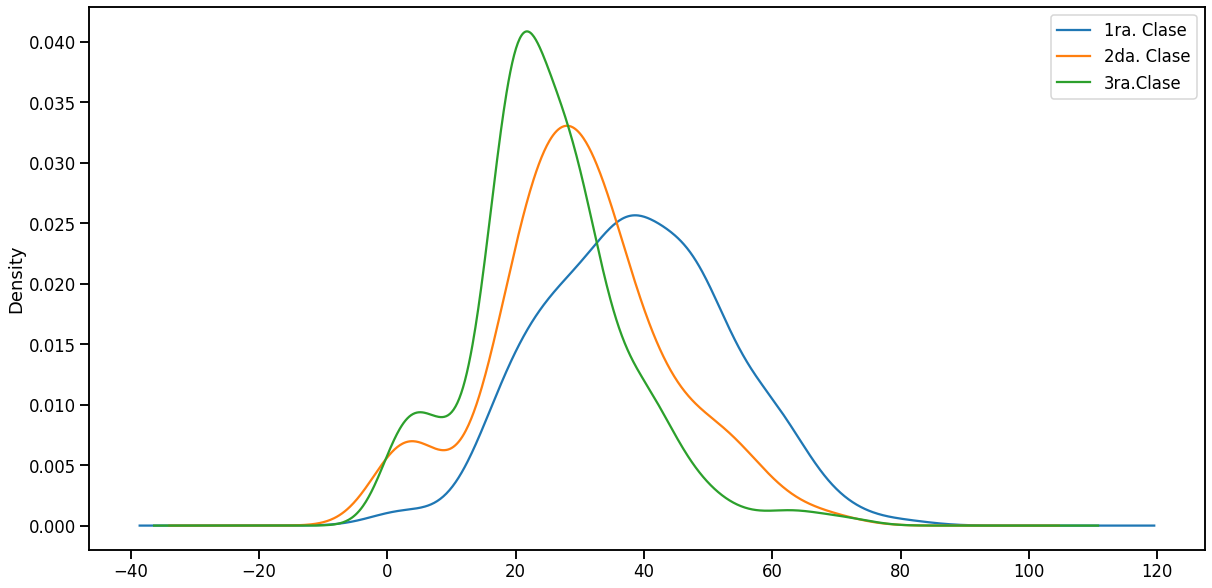

In [0]:
# Habra alguna relacion entre tipo de ticket y edad? (Poder Adquisitivo)
fig = plt.figure(figsize=(20,10))

for t_class in [1,2,3]:
    df_titanic.Age[df_titanic.Pclass == t_class].plot(kind='kde')
    
plt.legend(("1ra. Clase", "2da. Clase", "3ra.Clase"))  
plt.show()

# La linea de la 1ra clase, nos muestra que el promedio de edad del comprador es de 40 annios
# La linea de la 3ra clase, tiene un promedio mucho mas joven

# Podriamos hacer una inferencia temprana y decir que los hombres que salvaron fueron 
# en su mayoria ricos y > 30 annios

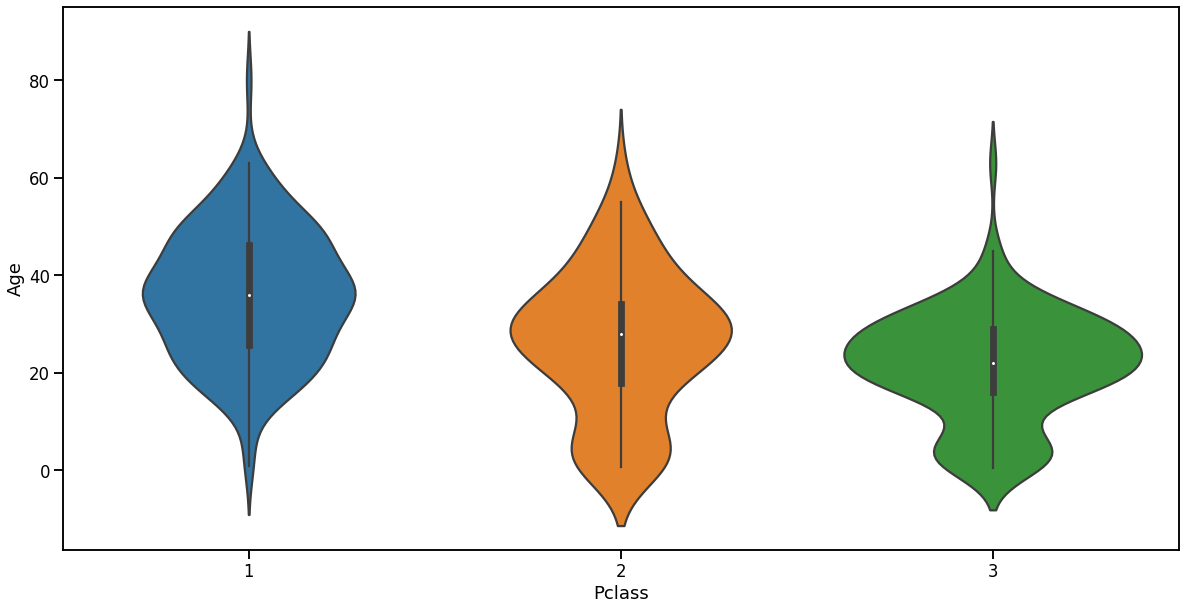

In [0]:
#Otra forma de mostrar densidades a medio camino entre hacer Kernel Density Estimation y usar Box and Whisker plots, son los violin plots:
plt.figure(figsize=(20,10))
df_survivors = df_titanic[df_titanic.Survived == 1]
sns.violinplot(x=df_survivors.Pclass,y=df_survivors.Age)

In [0]:
df_titanic[df_titanic.Age < 1]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
77,1,2,Master. Alden Gates Caldwell,male,0.83,0,2,29.0000
303,1,1,Master. Hudson Trevor Allison,male,0.92,1,2,151.5500
466,1,3,Miss. Helene Barbara Baclini,female,0.75,2,1,19.2583
641,1,3,Miss. Eugenie Baclini,female,0.75,2,1,19.2583
751,1,2,Master. Viljo Hamalainen,male,0.67,1,1,14.5000
799,1,3,Master. Assad Alexander Thomas,male,0.42,0,1,8.5167
827,1,2,Master. George Sibley Richards,male,0.83,1,1,18.7500
